In [1]:
import h5py
import pandas as pd
import numpy as np
import os
from utils.compute import compute_cluster
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
from scipy import ndimage
from scipy.stats import norm
colors = plb.cm.rainbow(np.linspace(0,1,31))

In [2]:
null_cuts = np.load('output/inferences/null_cuts.npy')
ale_convergence = np.load('output/inferences/ale_convergence_4mm.npy')
p_convergence = np.load('output/inferences/p_convergence_4mm.npy')
z_convergence = np.load('output/inferences/z_convergence_4mm.npy')
z_convergence_avg = np.average(z_convergence, axis=2)
p_transform_avg = 1 - norm.cdf(z_convergence_avg)
title = ['vFWE','cFWE','tfce']

In [3]:
null = h5py.File('output/null.hdf5', 'r')
null_cuts2 = np.zeros((31,3))
for i in range(15,46):
    pool_tfce = []
    pool_ale = []
    pool_cluster = []
    for ii in [0,1]:
        for iii in range(500):
            try:
                pool_ale.append(np.percentile(null[f'ale/{i}/{ii}/{iii}'][:], 95))
                pool_cluster.append(np.percentile(null[f'cluster/{i}/{ii}/{iii}'][:], 95))
                pool_tfce.append(np.percentile(null[f'tfce/{i}/{ii}/{iii}'][:], 95))
            except ValueError:
                print(i, ii, iii)
            except KeyError:
                print(i, ii, iii)

    ale_cut = np.mean(pool_ale)
    cluster_cut = np.mean(pool_cluster)
    tfce_cut = np.mean(pool_tfce)
    
    null_cuts2[i-15,0] = np.mean(pool_ale)
    null_cuts2[i-15,1] = np.mean(pool_cluster)
    null_cuts2[i-15,2] = np.mean(pool_tfce)

np.save('output/inferences/null_cuts2.npy', null_cuts2)

KeyboardInterrupt: 

In [9]:
for i in range(15,46):
    pool_tfce = np.zeros((1000*10000,))
    pool_ale = np.zeros((1000*10000,))
    pool_cluster = np.zeros((1000*10000))
    for ii in [0,1]:
        for iii in range(500):
            try:
                start_idx = iii*10000+(ii*5000000)
                pool_ale[start_idx:start_idx+10000,] = null[f'ale/{i}/{ii}/{iii}'][:]   
                pool_cluster[start_idx:start_idx+10000,] = null[f'cluster/{i}/{ii}/{iii}'][:]
                pool_tfce[start_idx:start_idx+10000,] = null[f'tfce/{i}/{ii}/{iii}'][:]
            except ValueError:
                print(i, ii, iii)
            except KeyError:
                print(i, ii, iii)

    ale_cut = np.percentile(pool_ale, 95)
    cluster_cut = np.percentile(pool_cluster, 95)
    tfce_cut = np.percentile(pool_tfce, 95)
    
    null_cuts[i-15,0] = ale_cut
    null_cuts[i-15,1] = cluster_cut
    null_cuts[i-15,2] = tfce_cut

np.save('output/inferences/null_cuts.npy', null_cuts)

In [ ]:
ale_convergence = np.zeros((31,11,500))
z_convergence = np.zeros((31,11,500))
for num_studies in range(15,46):
    print(num_studies)
    h5 = h5py.File(f"/data/project/pyALE_TFCE/output/main_{num_studies}_offset.gzip", "r")

    for num_true in range(11):
        for rep in range(500):
            z_convergence[num_studies-15, num_true, rep] = np.max(h5[f"z/{num_true}/{rep}"][58:63,48:53,65:68])
            ale_convergence[num_studies-15, num_true, rep] = np.max(h5[f"ale/{num_true}/{rep}"][58:63,48:53,63:68])

np.save('output/inferences/ale_convergence_4mm.npy', ale_convergence)
np.save('output/inferences/z_convergence_4mm.npy', z_convergence)

z_convergence_avg = np.average(z_convergence, axis=2)
p_transform_avg = 1 - norm.cdf(z_convergence_avg)

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


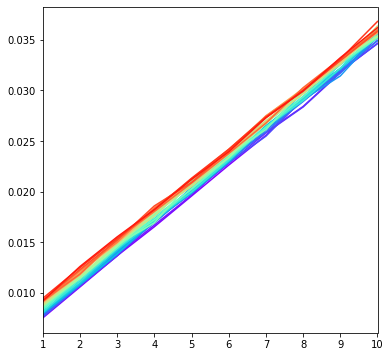

In [5]:
figure, ax = plt.subplots(1,1, figsize=(6,6))
for i in range(0,30):
    ax.plot(np.average(ale_convergence[i,1:], axis=1), color=colors[i])
ax.set_xticklabels(list(range(1,11)))
ax.margins(x=0)
plt.show()

In [5]:
p_convergence.shape

(31, 10, 500)

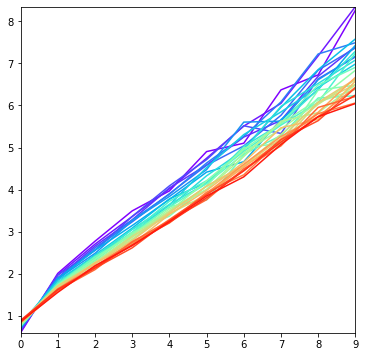

In [6]:
p_convergence_avg = np.average(p_convergence, axis=2)
figure, ax = plt.subplots(1,1, figsize=(6,6))
for i in range(0,30):
    ax.plot(-np.log10(p_convergence_avg[i,:]), color=colors[i])
ax.set_xticks(list(range(11)))
ax.margins(x=0, y=0)
plt.show()

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


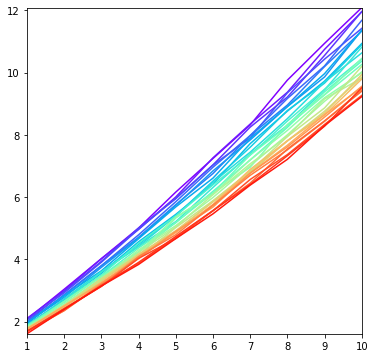

In [6]:
figure, ax = plt.subplots(1,1, figsize=(6,6))
for i in range(0,30):
    ax.plot(-np.log10(p_transform_avg[i,1:]), color=colors[i])
ax.set_xticklabels(list(range(1,11)))
ax.margins(x=0, y=0)
plt.show()

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


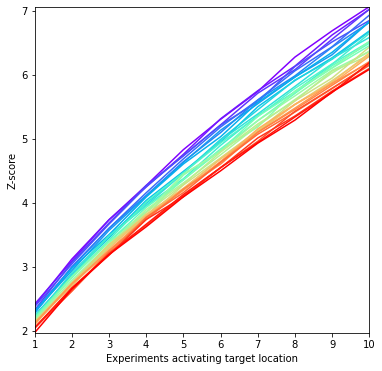

In [32]:
colors = plb.cm.rainbow(np.linspace(0,1,30))


figure, ax = plt.subplots(1,1, figsize=(6,6))
for i in range(0,30):
    ax.plot(np.average(z_convergence[i,1:,:], axis=1), color=colors[i])
ax.set_xticklabels(list(range(1,11)))
ax.set_ylabel('Z-score')
ax.set_xlabel('Experiments activating target location')
ax.margins(x=0, y=0)
plt.show()

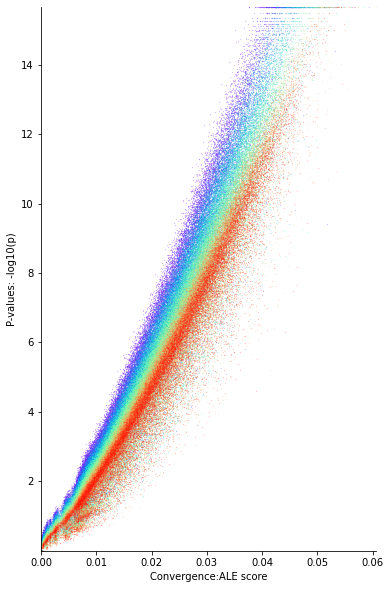

In [8]:
p_transform = 1 - norm.cdf(z_convergence)

figure, ax = plt.subplots(1,1, figsize=(6,10))
for i in range(0,30):
    ax.scatter(ale_convergence[i,:,:], -np.log10(p_transform[i,:,:]), color=colors[i], s=0.01)
ax.set_xlabel('Convergence:ALE score')
ax.set_ylabel('P-values: -log10(p)')
ax.margins(x=0, y=0)
sns.despine(right=True, top=True)
figure.show()

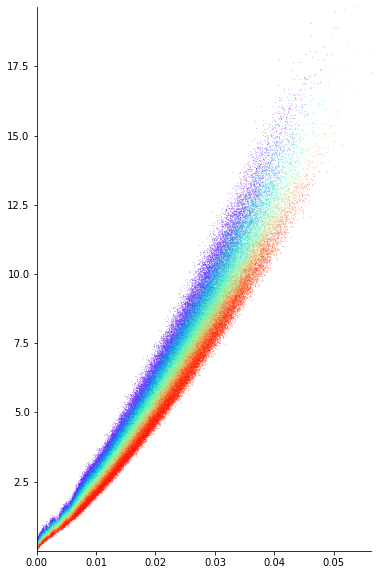

In [13]:
p_transform = 1 - norm.cdf(z_convergence)

figure, ax = plt.subplots(1,1, figsize=(6,10))
for i in range(0,30):
    ax.scatter(ale_convergence[i,:10,:], -np.log10(p_convergence[i,:,:]), color=colors[i], s=0.01)
ax.margins(x=0, y=0)
sns.despine(right=True, top=True)
figure.show()

In [2]:
true_array = [np.array((x,y,z)) for x in range(58,63) for y in range(48,53) for z in range(63,68)]

In [43]:
a = np.array([59,47,63])
b = np.array([60,50,65])
np.linalg.norm(a-b)

3.7416573867739413

In [3]:
true_array = [np.array((x,y,z)) for x in range(58,63) for y in range(48,53) for z in range(63,68)]

sensitivity = np.zeros((3,31,11,500))
cluster_size = np.zeros((3,31,11,500))
extra_clusters = np.zeros((3,31,11,500))

In [122]:
for idx, i in enumerate(range(15,46)):
    main = h5py.File(f'output/main_{i}_offset.gzip', 'r')
    print(i)
    for ii in range(11):
        if ii == 9:
            print(ii)
        else:
            print(ii, end=' ')
            
        counter = 0
        for iii in range(500):
            
            ale = main[f'ale/{ii}/{iii}'][:]
            ale_thresh = ale>null_cuts[idx,0]
            labels, cluster_count = ndimage.label(ale_thresh)
            sig_true = 0
            for coord in true_array:
                if ale_thresh[tuple(coord)] > 0:
                    sig_true = 1
                    sensitivity[0,idx,ii,iii] = 1
                    extra_clusters[0,idx,ii,iii] = cluster_count - 1

                    _ , sizes = np.unique(labels, return_counts=True)
                    cluster_size[0,idx,ii,iii] = sizes[labels[tuple(coord)]] * 8
                    print('1', cluster_count - 1, sizes[labels[tuple(coord)]] * 8)
                    break
            if sig_true == 0:
                extra_clusters[0,idx,ii,iii] = cluster_count
                    
            
            z = main[f'z/{ii}/{iii}'][:]
            z_corr, max_clust = compute_cluster(z, thresh=0.001, cut_cluster=null_cuts[idx,1])
            labels, cluster_count = ndimage.label(z_corr)
            sig_true = 0
            for coord in true_array:
                if z_corr[tuple(coord)] > 0:
                    sig_true = 1
                    sensitivity[1,idx,ii,iii] = 1
                    extra_clusters[1,idx,ii,iii] = cluster_count - 1

                    _ , sizes = np.unique(labels, return_counts=True)
                    cluster_size[1,idx,ii,iii] = sizes[labels[tuple(coord)]] * 8
                    
                    break
            if sig_true == 0:
                extra_clusters[1,idx,ii,iii] = cluster_count
                 
            
            tfce = main[f'tfce/{ii}/{iii}'][:]
            tfce_thresh = tfce>null_cuts[idx,2]
            labels, cluster_count = ndimage.label(tfce_thresh)
            _ , sizes = np.unique(labels, return_counts=True)
            sig_true = 0
            for coord in true_array:
                if tfce_thresh[tuple(coord)] > 0:
                    sig_true = 1
                    sensitivity[2,idx,ii,iii] = 1
                    extra_clusters[2,idx,ii,iii] = cluster_count - 1


                    cluster_size[2,idx,ii,iii] = sizes[labels[tuple(coord)]] * 8
                    
                    break
            if sig_true == 0:
                extra_clusters[2,idx,ii,iii] = cluster_count

45
10 1 0 896


In [128]:
np.save('output/inferences/sensitivity_8mm.npy', sensitivity)
np.save('output/inferences/extra_clusters_8mm.npy', extra_clusters)
np.save('output/inferences/csize_8mm.npy', cluster_size)

In [3]:
sensitivity = np.load('output/inferences/sensitivity_8mm.npy')
extra_clusters = np.load('output/inferences/extra_clusters_8mm.npy')
cluster_size = np.load('output/inferences/csize_8mm.npy')

In [62]:
tfce_better = []
cfwe_better = []
both = []

compare_arr = np.zeros((3,31,11))
for i in range(31):
    print(i, end=',')
    for ii in range(11):
        for iii in range(500):
            if sensitivity[1,i,ii,iii] > sensitivity[2,i,ii,iii]:
                compare_arr[0,i,ii] += 1
                cfwe_better.append([i,ii,iii])
            elif sensitivity[1,i,ii,iii] < sensitivity[2,i,ii,iii]:
                compare_arr[1,i,ii] += 1
                tfce_better.append([i,ii,iii])
            elif (sensitivity[1,i,ii,iii] == 1) and (sensitivity[2,i,ii,iii] ==1):
                compare_arr[2,i,ii] += 1
                both.append([i,ii,iii])
            else:
                compare_arr[2,i,ii] += 1

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,

In [63]:
tfce_only_cs = []
for ident in tfce_better:
    tfce_only_cs.append(cluster_size[2,ident[0],ident[1],ident[2]])
    
cfwe_only_cs = []
for ident in cfwe_better:
    cfwe_only_cs.append(cluster_size[1,ident[0],ident[1],ident[2]])
    
tfce_both_cs = []
cfwe_both_cs = []
for ident in both: 
    tfce_both_cs.append(cluster_size[2,ident[0],ident[1],ident[2]]) 
    cfwe_both_cs.append(cluster_size[1,ident[0],ident[1],ident[2]])

In [70]:
np.mean(tfce_only_cs)

87.83396226415094

In [71]:
np.mean(tfce_both_cs)

1173.7065847833503

In [72]:
np.mean(cfwe_both_cs)

1722.8390115513964

In [73]:
np.mean(cfwe_only_cs)

872.2316644113668

In [127]:
main = h5py.File(f'output/main_25_offset.gzip', 'r')

In [185]:
z = main[f'z/7/153'][:]

In [186]:
z_corr, max_clust = compute_cluster(z, thresh=0.001, cut_cluster=90)

In [132]:
tfce = main[f'tfce/7/152'][:]

In [129]:
[10, 7, 152]

[10, 7, 152]

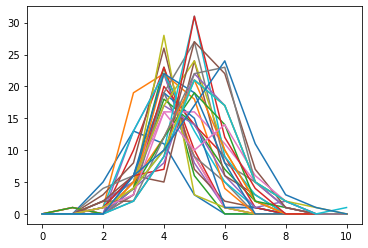

In [43]:
plt.plot(compare_arr[1].T)
plt.show()

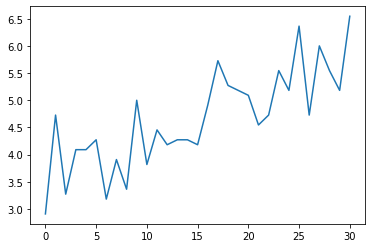

In [39]:
plt.plot(np.average(compare_arr[1], axis=1))

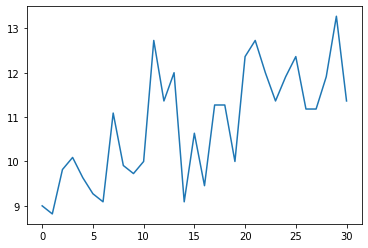

In [38]:
plt.plot(np.average(compare_arr[0], axis=1))

In [4]:
sens_avg = np.average(sensitivity, axis=3)

In [39]:
from scipy.stats import chisquare, fisher_exact

In [56]:
for i in range(31):
    for ii in range(11):
        unique_cfwe = np.unique(sensitivity[1,i,ii], return_counts=True)
        if len(unique_cfwe[0]) == 1:
            if unique_cfwe[0][0] == 0.0:
                counts_cfwe = [500,0]
            else:
                counts_cfwe = [0,500]
        else:
            counts_cfwe = unique_cfwe[1]
        unique_tfce = np.unique(sensitivity[2,i,ii], return_counts=True)
        if len(unique_tfce[0]) == 1:
            if unique_tfce[0][0] == 0.0:
                counts_tfce = [500,0]
            else:
                counts_tfce = [0,500]
        else:
            counts_tfce = unique_tfce[1]
        table = np.array((counts_cfwe, counts_tfce))
        fisher_results = fisher_exact(table, 'two-sided')
        if fisher_results[1] < 0.05:
            print(f'{i+15}, {ii} significant difference; p-value', fisher_results[1])

15, 5 significant difference; p-value 0.011756519075582901
16, 5 significant difference; p-value 0.01083014101049571
17, 5 significant difference; p-value 0.009762834443001793
18, 6 significant difference; p-value 0.006686676248301013
19, 5 significant difference; p-value 0.008751200886870932
20, 5 significant difference; p-value 0.01444186453206523
21, 6 significant difference; p-value 0.03174080977058591
22, 5 significant difference; p-value 0.020340196125295668
23, 5 significant difference; p-value 0.004630608528594446
23, 6 significant difference; p-value 0.012226164316283067
25, 6 significant difference; p-value 0.004351133596405479
26, 6 significant difference; p-value 0.0002259672287387018
26, 7 significant difference; p-value 0.039721595038396645
27, 5 significant difference; p-value 0.039940077035122576
27, 6 significant difference; p-value 0.03356794650103502
28, 6 significant difference; p-value 0.012781405408608046
30, 6 significant difference; p-value 0.024705636860982358


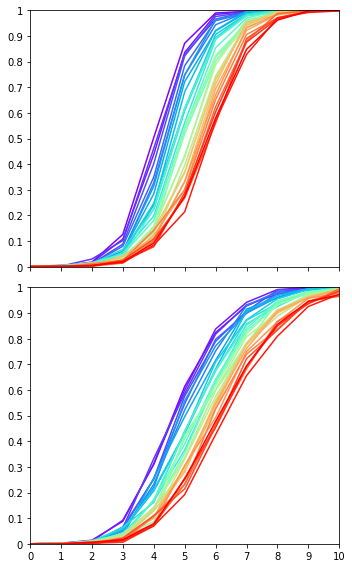

In [23]:
sens_avg = np.average(sensitivity, axis=3)
figure, ax = plt.subplots(2,1, figsize=(5,8), sharex=True,sharey=True)
for i in range(31):
    ax[1].plot(sens_avg[0,i,:], color=colors[i])
    ax[0].plot(sens_avg[1,i,:], color=colors[i])
for i in range(2):
    ax[i].set_xticks(list(range(0,11)))
    ax[i].set_ylim(0,1)
    ax[i].set_yticks(list(np.arange(0,1.1,0.1)))
    ax[i].set_yticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax[i].margins(x=0,y=0)

plt.tight_layout()
plt.show()

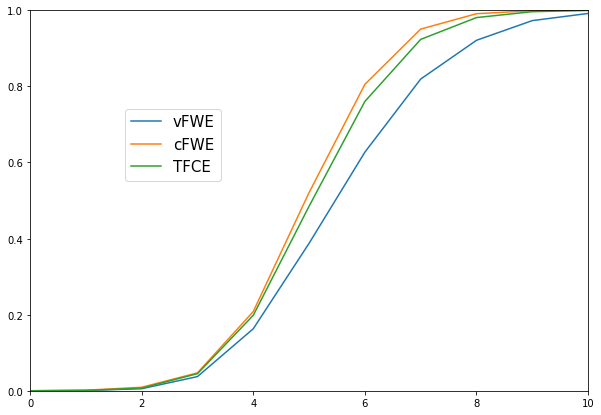

In [25]:
figure, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(np.average(sens_avg, axis=1).T)
ax.margins(x=0,y=0)
ax.set_ylim(0,1)
figure.legend(['vFWE','cFWE','TFCE'], bbox_to_anchor=(0.4, 0.7), prop={'size': 15})
figure.show()

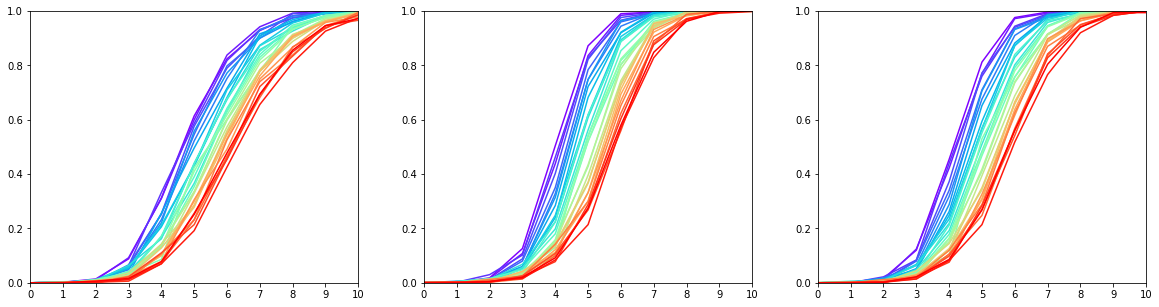

In [36]:
sens_avg = np.average(sensitivity, axis=3)
figure, ax = plt.subplots(1,3, figsize=(20,5), sharex=True)
for i in range(31):
    ax[0].plot(sens_avg[0,i,:], color=colors[i])
    ax[1].plot(sens_avg[1,i,:], color=colors[i])
    ax[2].plot(sens_avg[2,i,:], color=colors[i])
for i in range(3):
    ax[i].set_xticks(list(range(0,11)))
    ax[i].margins(x=0,y=0)
plt.show()

In [11]:
sens_avg = np.average(sensitivity, axis=3)

In [29]:
sens_diff = sensitivity[1] - sensitivity[2]

In [34]:
sens_diff = sens_avg[1] - sens_avg[2]

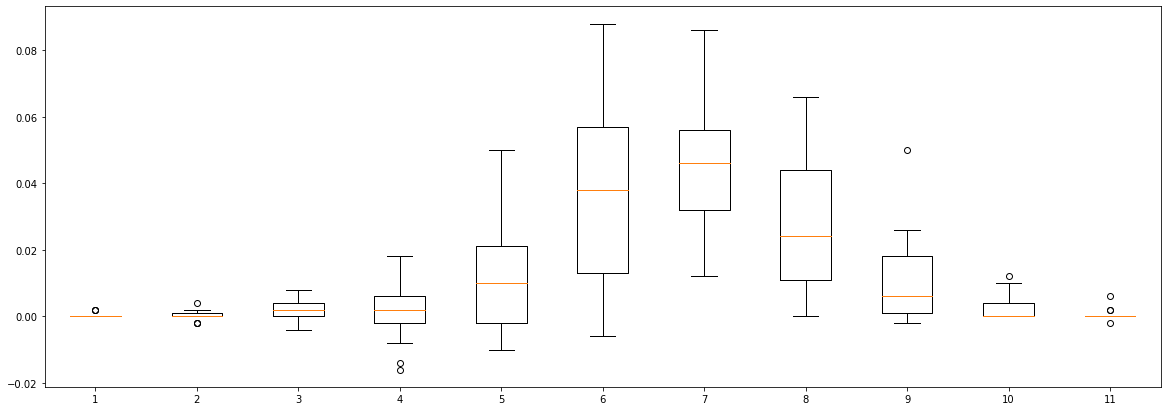

In [41]:
figure, ax = plt.subplots(1,1, figsize=(20,7))
ax.boxplot(sens_diff)
figure.show()

In [46]:
list(range(15,46,5)) + ['Average']

[15, 20, 25, 30, 35, 40, 45, 'Average']

In [68]:

import matplotlib.colors as mcolors

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


NameError: name 'mcolors' is not defined

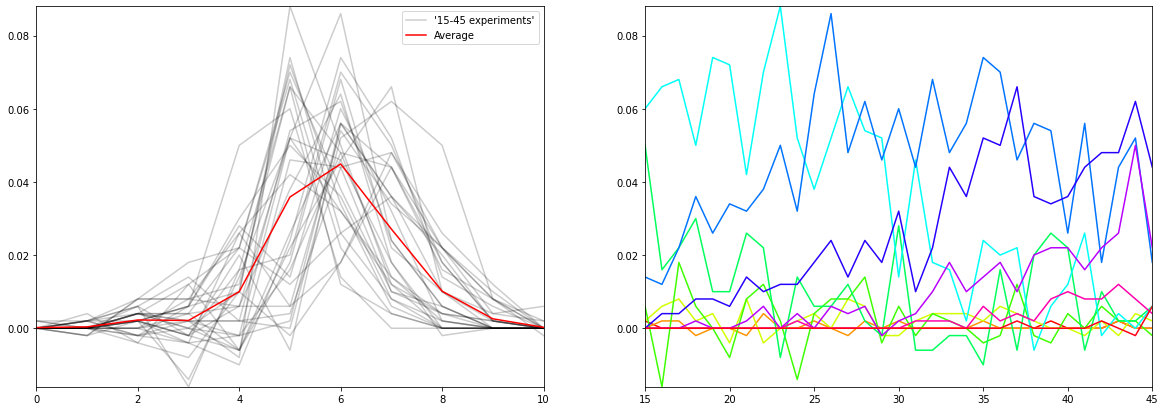

In [20]:
sens_diff = sens_avg[1] - sens_avg[2]

figure, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].plot(sens_diff.T, color='black', ls='-', alpha=0.2, label="'15-45 experiments'")
ax[0].plot(np.average(sens_diff, axis=0), color='red', label='Average')
ax[0].margins(x=0,y=0)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend([handles[0], handles[-1]], [labels[0], labels[-1]], loc='best')


colors = plb.cm.hsv(np.linspace(0,1,11))
for i in range(11):
    ax[1].plot(sens_diff[:,i], color=colors[i], ls='-', alpha=1)
ax[1].set_xticklabels(list(range(15,46,5)))
ax[1].margins(x=0,y=0)
normalize = mcolors.Normalize(vmin=0, vmax=11)
scalarmappaple = plb.cm.ScalarMappable(norm=normalize, cmap='hsv')
scalarmappaple.set_array(11)
figure.colorbar(scalarmappaple)


figure.savefig('output/pictures/sens_diff', dpi=330)

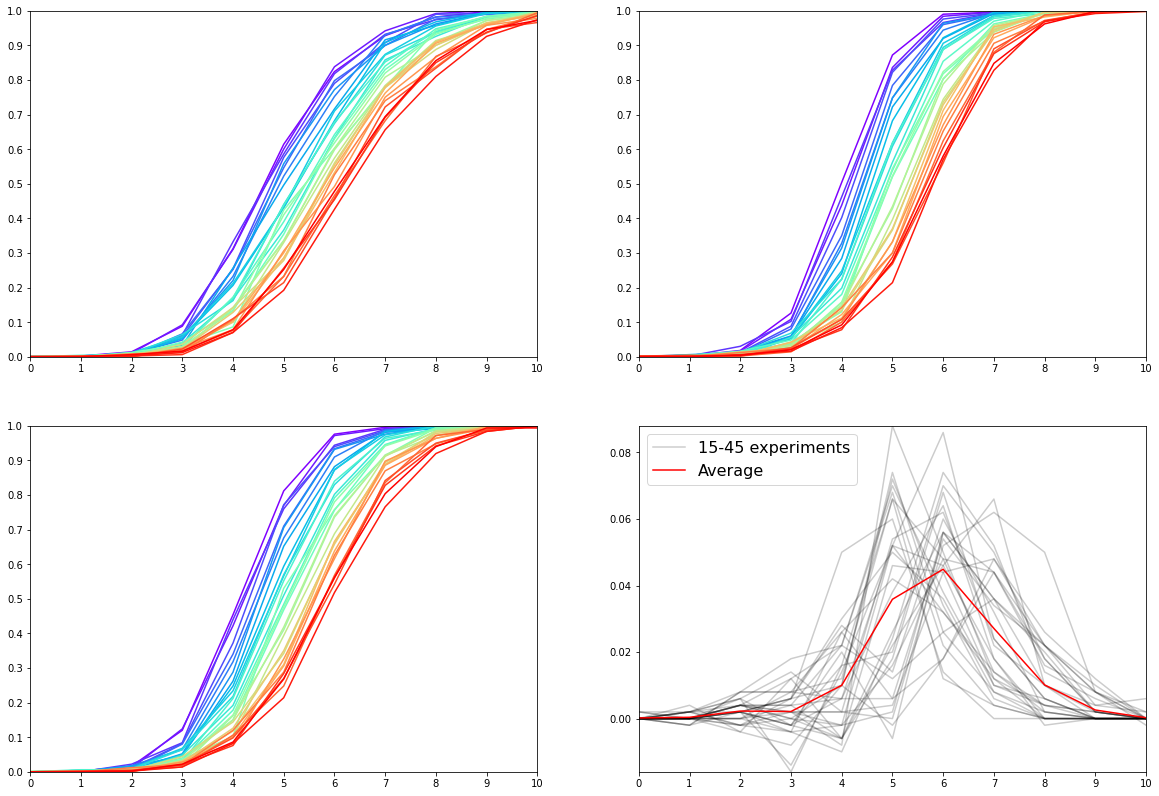

In [34]:
sens_avg = np.average(sensitivity, axis=3)
figure, ax = plt.subplots(2,2, figsize=(20,14))
for i in range(31):
    ax[0,0].plot(sens_avg[0,i,:], color=colors[i])
    ax[0,1].plot(sens_avg[1,i,:], color=colors[i])
    ax[1,0].plot(sens_avg[2,i,:], color=colors[i])
for i in [0,1]:
    for ii in [0,1]:
        if i == 1 & ii == 1:
            continue
        else:
            ax[i,ii].set_xticks(list(range(0,11)))
            ax[i,ii].set_yticks(np.arange(0,1.1,0.1))
            ax[i,ii].margins(x=0,y=0)
ax[1,1].plot(sens_diff.T, color='black', ls='-', alpha=0.2, label='15-45 experiments')
ax[1,1].plot(np.average(sens_diff, axis=0), color='red', label='Average')
ax[1,1].margins(x=0,y=0)
handles, labels = ax[1,1].get_legend_handles_labels()
ax[1,1].legend([handles[0], handles[-1]], [labels[0], labels[-1]], loc='upper left', prop={'size': 16})
ax[1,1].set_xticks(list(range(0,11)))
            

        
figure.savefig('output/pictures/sens_standard', dpi=330)

In [35]:
cluster_size[cluster_size == 0] = np.nan
csize_avg = np.nanmean(cluster_size, axis=3)

csize_avg = np.nan_to_num(csize_avg)

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [39]:
cluster_size = np.nan_to_num(cluster_size)
csize_avg = np.average(cluster_size, axis=3)

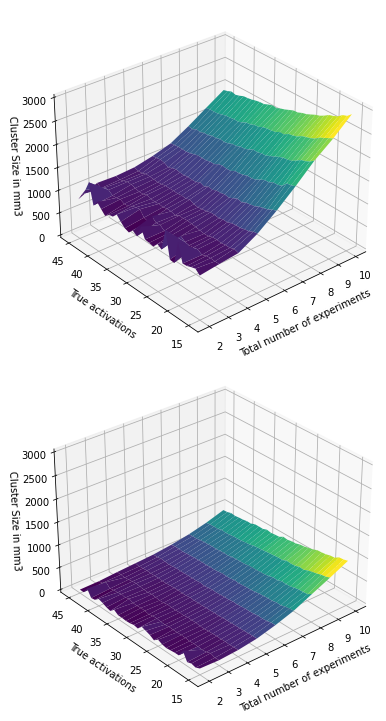

In [36]:

fig, ax = plt.subplots(2,1, subplot_kw={"projection": "3d"}, figsize=(6,10))
# Make data.
Y = list(range(15,46))
X = np.arange(2,11)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
ax[1].plot_surface(X, Y, csize_avg[0,:,2:], cmap='viridis')
ax[0].plot_surface(X, Y, csize_avg[1,:,2:], cmap='viridis')

for i in range(2):
    ax[i].set_zlim([0, 3000])
    ax[i].set_xlabel('Total number of experiments')
    ax[i].set_ylabel('True activations')
    ax[i].set_zlabel('Cluster Size in mm3')
    ax[i].view_init(azim=230)
    
fig.tight_layout()

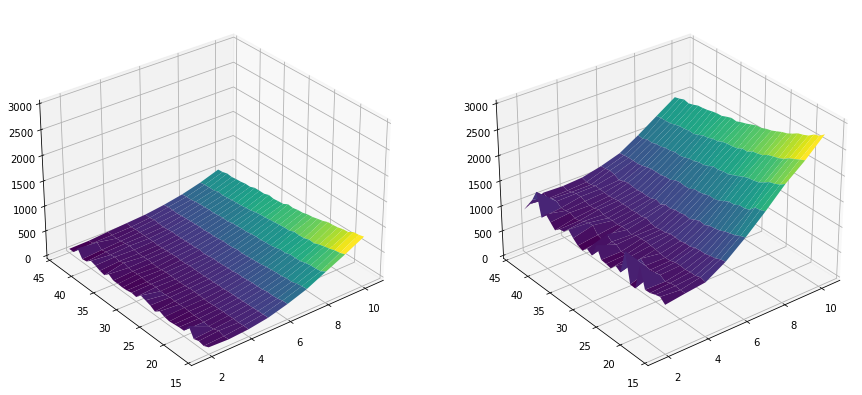

In [62]:
fig, ax = plt.subplots(1,2, subplot_kw={"projection": "3d"}, figsize=(15,10))
# Make data.
Y = list(range(15,46))
X = np.arange(2,11)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
ax[0].plot_surface(X, Y, csize_avg[0,:,2:], cmap='viridis')
ax[1].plot_surface(X, Y, csize_avg[1,:,2:], cmap='viridis')

for i in [0,1]:
    ax[i].set_zlim([0, 3000])
    ax[i].view_init(azim=232)
    ax[i].margins(x=0.1,y=0)
    
fig.savefig('output/pictures/c_size_FWE.png', dpi=330)

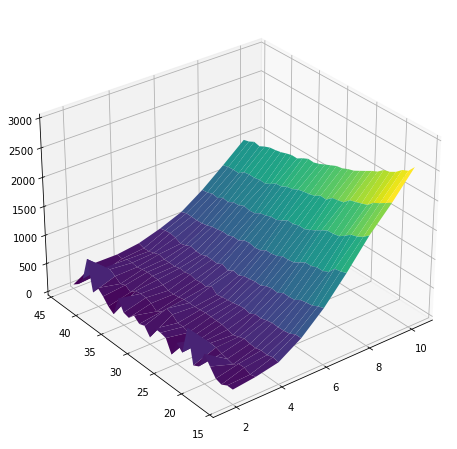

In [66]:
fig, ax = plt.subplots(1,1, subplot_kw={"projection": "3d"}, figsize=(10,8))
# Make data.
Y = list(range(15,46))
X = np.arange(2,11)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
ax.plot_surface(X, Y, csize_avg[2,:,2:], cmap='viridis')
ax.set_zlim([0, 3000])
ax.view_init(azim=232)
ax.margins(x=0.1,y=0)
    
fig.savefig('output/pictures/c_size_TFCE.png', dpi=330)

In [68]:
csize_diff = csize_avg[1] - csize_avg[2]

In [76]:
csize_diff_avg = np.average(csize_diff[:,2:], axis=0)

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


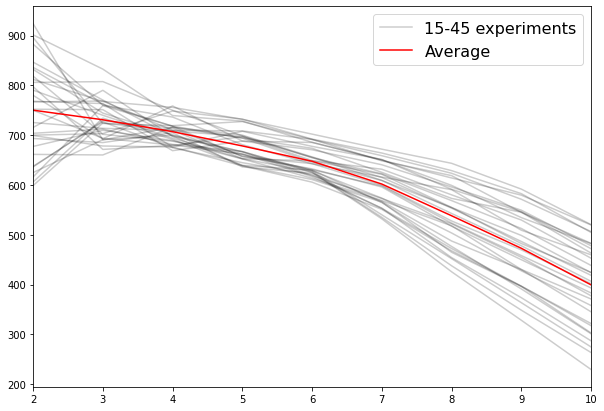

In [87]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.plot(csize_diff[:,2:].T, color='black', alpha=0.2, label='15-45 experiments')
ax.plot(csize_diff_avg, color='red', label='Average')
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[-1]], [labels[0], labels[-1]], loc='upper right', prop={'size': 16})
ax.margins(x=0)
ax.set_xticklabels(range(2,11))
fig.savefig('output/pictures/c_size_diff.png', dpi=330)

/home/lfrahm/.venvs/pyALE/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


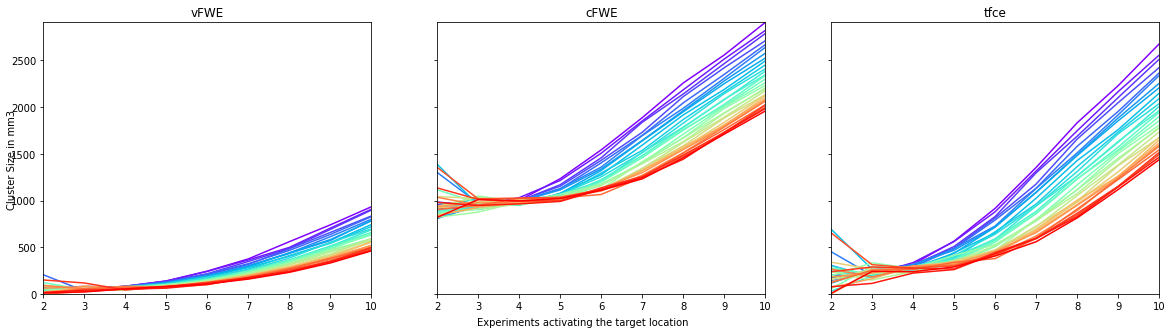

In [44]:
figure, ax = plt.subplots(1,3, figsize=(20,5), sharex=True,sharey=True)
for i in range(15,46):
    ax[0].plot(csize_avg[0,i-15,2:], color=colors[i-15])
    ax[1].plot(csize_avg[1,i-15,2:], color=colors[i-15])
    ax[2].plot(csize_avg[2,i-15,2:], color=colors[i-15])
for i in range(3):
    ax[i].set_xticklabels(list(range(2,11)))
    ax[i].set_title(title[i])
    ax[i].margins(x=0, y=0)
figure.text(0.5, 0.04, 'Experiments activating the target location', ha='center')
figure.text(0.1, 0.5, 'Cluster Size in mm3', va='center', rotation='vertical')
plt.show()

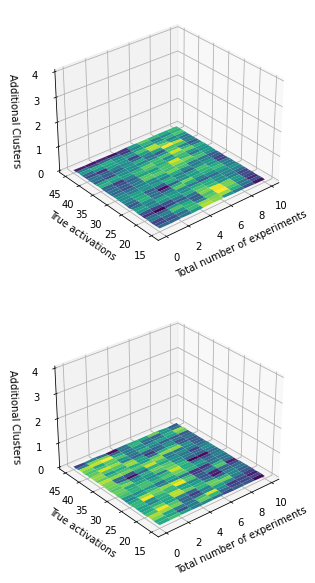

In [9]:
extra_clust_avg = np.average(extra_clusters, axis=3)
fig, ax = plt.subplots(2,1, subplot_kw={"projection": "3d"}, figsize=(6,10))
# Make data.
Y = list(range(15,46))
X = np.arange(0,11)
X, Y = np.meshgrid(X, Y)
for i in [1,0]:
    ax[i].plot_surface(X, Y, extra_clust_avg[i], cmap='viridis')
    ax[i].set_zlim([0, 4])
    ax[i].set_zticks([0,1,2,3,4])
    ax[i].set_xlabel('Total number of experiments')
    ax[i].set_ylabel('True activations')
    ax[i].set_zlabel('Additional Clusters')
    ax[i].view_init(azim=230)

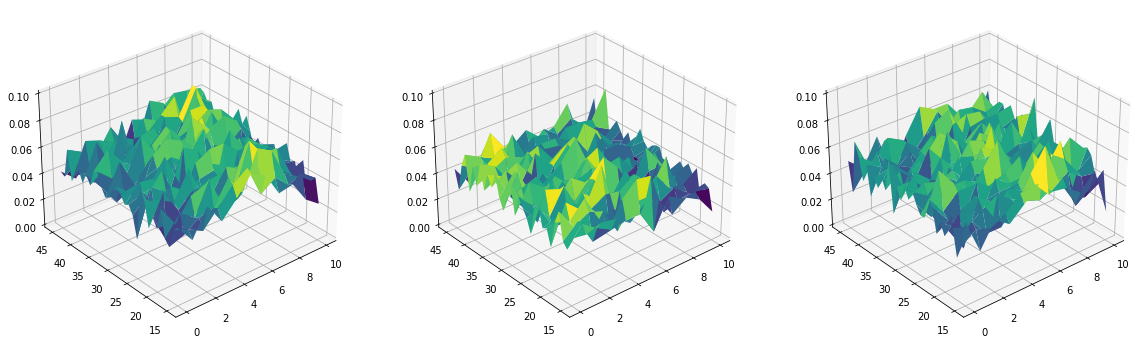

In [95]:
fig, ax = plt.subplots(1,3, subplot_kw={"projection": "3d"}, figsize=(20,13))
# Make data.
Y = list(range(15,46))
X = np.arange(0,11)
X, Y = np.meshgrid(X, Y)
for i in range(3):
    ax[i].plot_surface(X, Y, extra_clust_avg[i], cmap='viridis')
    ax[i].set_zlim([0, 0.1])
    ax[i].set_zticks([0.00,0.02,0.04,0.06,0.08,0.1])
    ax[i].view_init(azim=230)
    
fig.savefig('output/pictures/extra_clusters_standard', dpi=330)

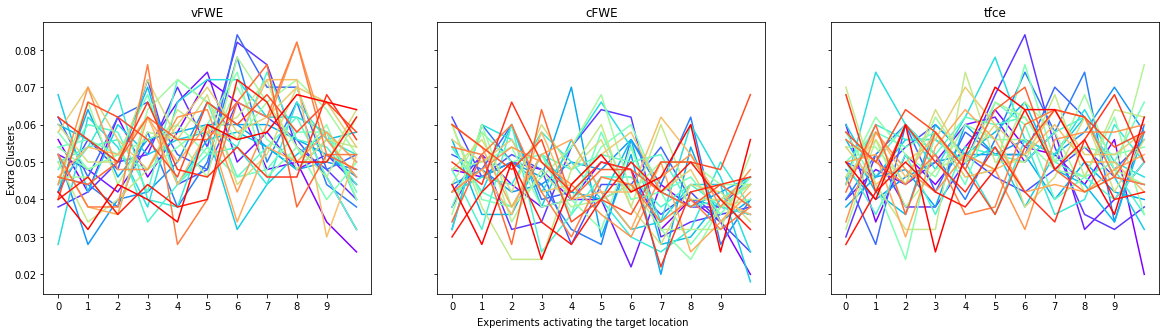

In [135]:
figure, ax = plt.subplots(1,3, figsize=(20,5), sharex=True,sharey=True)
for i in range(31):
    ax[0].plot(extra_clust_avg[0,i], color=colors[i])
    ax[1].plot(extra_clust_avg[1,i], color=colors[i])
    ax[2].plot(extra_clust_avg[2,i], color=colors[i])
for i in range(3):
    ax[i].set_xticks(list(range(0,10)))
    ax[i].set_title(title[i])
figure.text(0.5, 0.04, 'Experiments activating the target location', ha='center')
figure.text(0.1, 0.5, 'Extra Clusters', va='center', rotation='vertical')
plt.show()

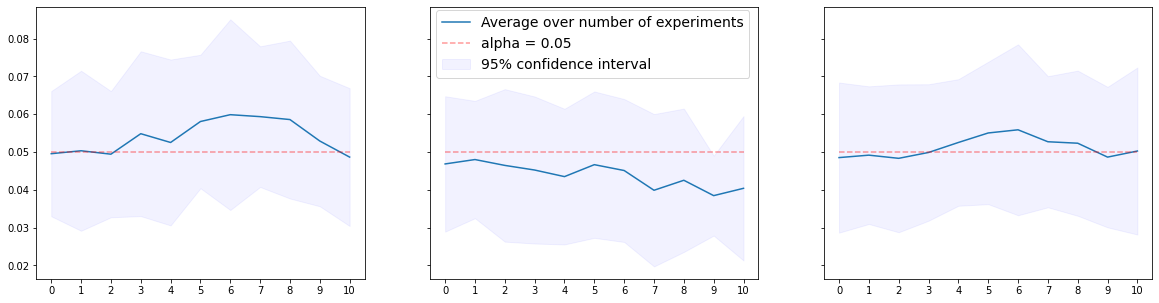

In [125]:
figure, ax = plt.subplots(1,3, figsize=(20,5), sharex=True,sharey=True)
for i in range(3):
    x = list(range(0,11))
    y = np.mean(extra_clust_avg[i], axis=0)
    ax[i].plot(y)
    ax[i].fill_between(x, (y - 1.96 * np.std(extra_clust_avg[i], axis=0)), (y+ 1.96 * np.std(extra_clust_avg[i], axis=0)), color='blue', alpha=.05)
    ax[i].set_xticks(x)
    ax[i].plot([0,10], [0.05,0.05], color='red', ls='--', alpha=.4)
figure.legend(['Average over number of experiments', 'alpha = 0.05', '95% confidence interval'], bbox_to_anchor=(0.625, 0.89), prop={'size': 14})
figure.savefig('output/pictures/extra_clusters_avg_standard', dpi=330)

In [136]:
sens_avg = np.average(sensitivity, axis=3)

In [137]:
from scipy.stats import binom


p_of_pop = np.arange(0.1,0.55,0.01)
expected_power = np.zeros((31,len(p_of_pop),3))
for i in range(3):
    for N in range(15,46):
        for idx, p in enumerate(p_of_pop):
            for x in range(N+1):
                if x < 10:
                    expected_power[N-15,idx,i] += sens_avg[i,N-15,x] * binom.pmf(x, N, p)
                else:
                    expected_power[N-15,idx,i] += sens_avg[i,N-15,9] * binom.pmf(x, N, p)

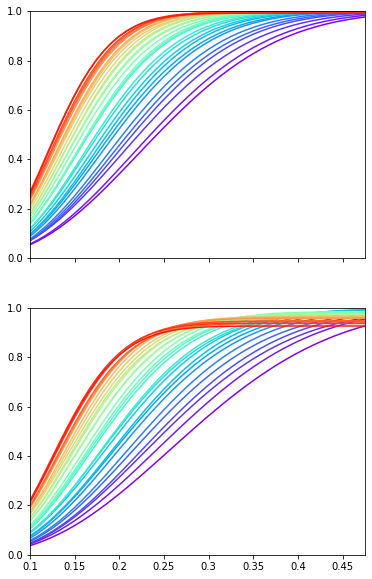

In [138]:
figure, ax = plt.subplots(2,1, figsize=(6,10), sharex=True,sharey=True)
for i in range(30):
    ax[0].plot(expected_power[i,:,1],color=colors[i])
    ax[1].plot(expected_power[i,:,0],color=colors[i])
for i in range(2):
    ax[i].set_xticks(range(0,50,6))
    ax[i].set_xticklabels(np.round(np.arange(0.1,0.55,0.05), 2))
    ax[i].margins(x=0, y=0)
    ax[i].set_ylim(0,1)
plt.show()

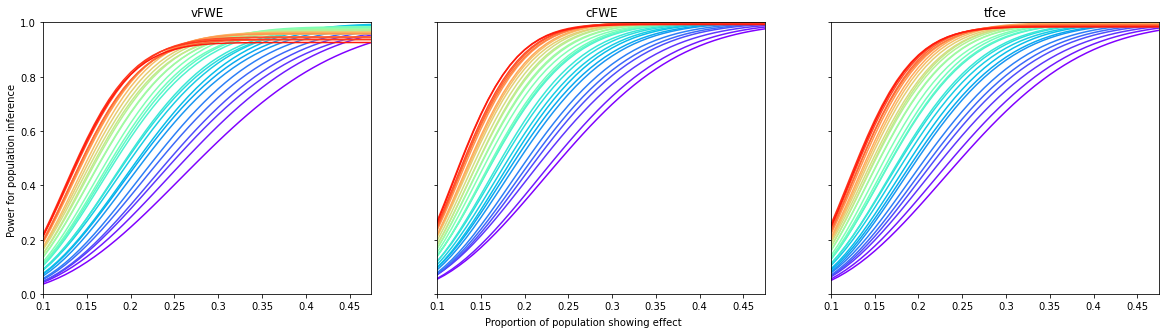

In [139]:
figure, ax = plt.subplots(1,3, figsize=(20,5), sharex=True,sharey=True)
for i in range(30):
    ax[0].plot(expected_power[i,:,0], color=colors[i])
    ax[1].plot(expected_power[i,:,1], color=colors[i])
    ax[2].plot(expected_power[i,:,2], color=colors[i])
for i in range(3):
    ax[i].set_xticks(range(0,50,6))
    ax[i].set_xticklabels(np.round(np.arange(0.1,0.55,0.05), 2))
    ax[i].set_title(title[i])
    ax[i].margins(x=0, y=0)
    ax[i].set_ylim(0,1)
figure.text(0.5, 0.04, 'Proportion of population showing effect', ha='center')
figure.text(0.1, 0.5, 'Power for population inference', va='center', rotation='vertical')
plt.show()

In [140]:
expected_power_avg = np.average(expected_power, axis=0)

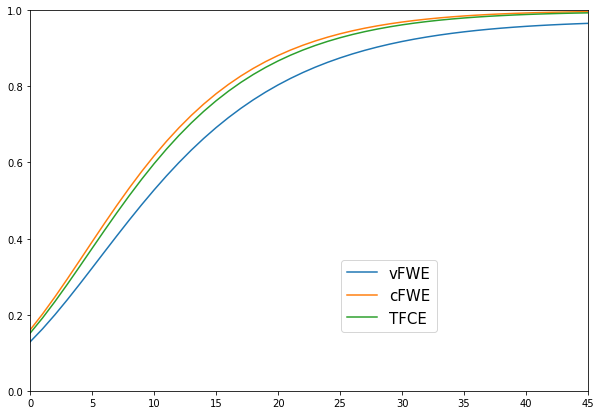

In [141]:
figure, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(expected_power_avg)
ax.margins(x=0,y=0)
ax.set_ylim(0,1)
figure.legend(['vFWE','cFWE','TFCE'], bbox_to_anchor=(0.7, 0.4), prop={'size': 15})
figure.show()

In [39]:
necessary_amount_of_studies = np.ones((46,3)) * 45
for i in range(46):
    for ii in range(3):
        first_index = np.where(expected_power[:,i,ii] > 0.8)[0]
        if len(first_index) > 0:
            necessary_amount_of_studies[i,ii] = first_index[0] + 15

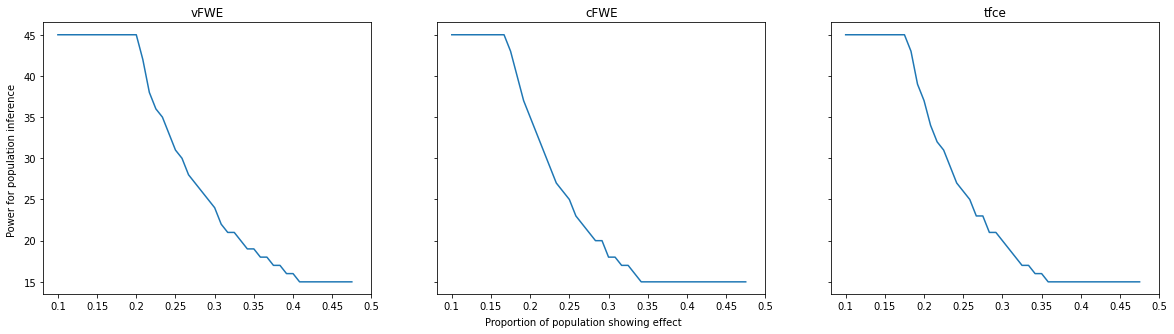

In [40]:
figure, ax = plt.subplots(1,3, figsize=(20,5), sharex=True,sharey=True)
for i in range(3):
    ax[i].plot(necessary_amount_of_studies[:,i])
    ax[i].set_xticks(range(0,50,6))
    ax[i].set_xticklabels(np.round(np.arange(0.1,0.55,0.05), 2))
    ax[i].set_title(title[i])
figure.text(0.5, 0.04, 'Proportion of population showing effect', ha='center')
figure.text(0.1, 0.5, 'Power for population inference', va='center', rotation='vertical')
plt.show()